# Minimal Local Tester Notebook
# Mirrors original Tester_Notebook; only difference: local path variable instead of Colab drive.

In [ ]:
# Imports (minimal, like original)
from project import run_pipeline_on_unseen_data
import duckdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Imports ready.


In [ ]:
# Local path to mimiciii.duckdb (replace if stored elsewhere)
mimic_path = '../data/mimiciii.duckdb'
con = duckdb.connect(mimic_path)

Connection established.
Using test subject file: ..\data\test_example.csv


In [ ]:
# Run pipeline (mirrors original)
test = pd.read_csv('../data/test_example.csv')
predction_df = run_pipeline_on_unseen_data(test['subject_id'].to_list(), con)

Running new calibrated pipeline for 50 subjects...


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

DEBUG(build_features): first_adm columns -> ['subject_id', 'hadm_id', 'admittime', 'dischtime', 'deathtime', 'admission_type', 'admission_location', 'discharge_location', 'diagnosis', 'insurance', 'language', 'marital_status', 'ethnicity', 'los_hours']
DEBUG(build_features): demo columns -> ['SUBJECT_ID', 'GENDER', 'DOB', 'DOD', 'EXPIRE_FLAG']
DEBUG(build_features): age computation failed -> Overflow in int64 addition
Pipeline completed.
Pipeline completed.


C:\Users\Almog Luz\AppData\Local\Temp\ipykernel_17092\3908593904.py:133: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  out = pd.concat([


,subject_id,mortality_proba,prolonged_LOS_proba,readmission_proba
0,1046,0.152824,0.879941,0.051111
1,1597,0.152824,0.813559,0.051111
2,1728,0.152824,0.813559,0.051111
3,1844,0.083710,0.879941,0.051111
4,3329,0.083710,0.786517,0.056837


In [ ]:
# Validate Shape
assert(isinstance(predction_df, pd.DataFrame))
assert(predction_df.shape[1] == 4)
assert(set(predction_df.columns) == set(['subject_id', 'mortality_proba', 'prolonged_LOS_proba', 'readmission_proba']))

Shape & columns validated.


In [ ]:
# Show Data Sample
predction_df.head()

,subject_id,mortality_proba,prolonged_LOS_proba,readmission_proba
0,1046,0.152824,0.879941,0.051111
1,1597,0.152824,0.813559,0.051111
2,1728,0.152824,0.813559,0.051111
3,1844,0.083710,0.879941,0.051111
4,3329,0.083710,0.786517,0.056837
5,5456,0.152824,0.813559,0.056837
6,6141,0.083710,0.786517,0.056837
7,7800,0.083710,0.786517,0.056837
8,8763,NaN,NaN,NaN
9,9347,0.152824,0.786517,0.056837


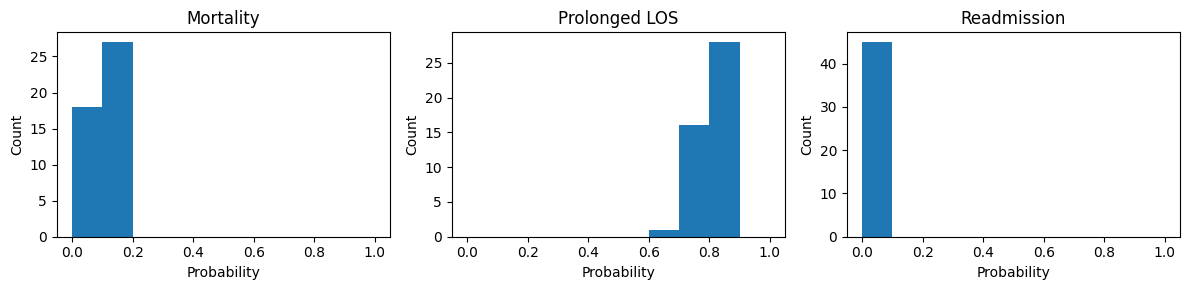

In [ ]:
# Probability Plots
fig, ax = plt.subplots()
ax.hist(predction_df['mortality_proba'], range=(0, 1), bins=10)
ax.set_xlabel('Mortality Probabilities')
ax.set_ylabel('Count')

fig, ax = plt.subplots()
ax.hist(predction_df['prolonged_LOS_proba'], range=(0, 1), bins=10)
ax.set_xlabel('Prolonged Length of Stay Probabilities')
ax.set_ylabel('Count')

fig, ax = plt.subplots()
ax.hist(predction_df['readmission_proba'], range=(0, 1), bins=10)
ax.set_xlabel('Readmission Probabilities')
ax.set_ylabel('Count')
plt.show()